# Libraries

In [1]:
# Data analysis and wrangling
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

#remove warnings
import warnings
warnings.filterwarnings('ignore')

#sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse
from sklearn import linear_model
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

# Import and read data


In [2]:
#remove the first unwanted column 'unnamed'
data = pd.read_excel('anz.xlsx', index_col=[0])
data.head()

,status,card_present_flag,account,currency,long_lat,txn_description,merchant_id,first_name,balance,date,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,Diana,35.39,2018-08-01,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,Diana,21.20,2018-08-01,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,Michael,5.71,2018-08-01,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,Rhonda,2117.22,2018-08-01,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,Diana,17.95,2018-08-01,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12043 entries, 0 to 12042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   account            12043 non-null  object        
 3   currency           12043 non-null  object        
 4   long_lat           12043 non-null  object        
 5   txn_description    12043 non-null  object        
 6   merchant_id        7717 non-null   object        
 7   first_name         12043 non-null  object        
 8   balance            12043 non-null  float64       
 9   date               12043 non-null  datetime64[ns]
 10  gender             12043 non-null  object        
 11  age                12043 non-null  int64         
 12  merchant_suburb    7717 non-null   object        
 13  merchant_state     7717 non-null   object        
 14  extrac

In [4]:
#setting the background for seaborn
sns.set_style('darkgrid')

# Creating Annual Salary

In [5]:
#exclude all except pay/salary in txn_description
Salary = data[(data['txn_description'] == 'PAY/SALARY')]

#summing amount by customer id to sum up  all the salary during the 3 months
Salary= Salary.pivot_table(index='customer_id',values='amount',aggfunc=np.sum)
Salary.reset_index(inplace=True)

#creating annual salary by multiplying the sum of amount by 4(the data is 3 months data and so a year which is 12 months need to be multiplied by 4)
Salary['Annual_Salary'] = (round(Salary['amount']*4,2))
Salary.head()

,customer_id,amount,Annual_Salary
0,CUS-1005756958,12616.11,50464.44
1,CUS-1117979751,25050.55,100202.20
2,CUS-1140341822,11499.06,45996.24
3,CUS-1147642491,22248.07,88992.28
4,CUS-1196156254,27326.11,109304.44


# Creating Annual Balance

In [6]:
#exclude all except pay/salary in txn_description
Balance = data[(data['txn_description'] == 'PAY/SALARY')]

#summing amount by customer id to sum up  all the balance during the 3 months
Balance= Balance.pivot_table(index='customer_id',values='balance',aggfunc=np.sum)
Balance.reset_index(inplace=True)

#creating annual balance by multiplying the sum of amount by 4(the data is 3 months data and so a year which is 12 months need to be multiplied by 4)
Balance['Annual_balance'] = (round(Balance['balance']*4,2))
Balance.head()

,customer_id,balance,Annual_balance
0,CUS-1005756958,61342.65,245370.60
1,CUS-1117979751,83700.42,334801.68
2,CUS-1140341822,35050.32,140201.28
3,CUS-1147642491,114575.08,458300.32
4,CUS-1196156254,166920.02,667680.08


# Expenses

In [7]:
#exclude credit in movement.
Expense = data[data['movement'] == 'debit']

#summing amount by customer id to sum up  all the expenses during the 3 months
Expense = Expense.pivot_table(index='customer_id',values='amount',aggfunc=np.sum)

#creating annual expenses by multiplying the sum of amount by 4(the data is 3 months data and so a year which is 12 months need to be multiplied by 4)
Expense['Annual_Expense'] = round(Expense['amount']*4)
Expense.reset_index(inplace=True)
Expense.head()

,customer_id,amount,Annual_Expense
0,CUS-1005756958,3652.86,14611.0
1,CUS-1117979751,8933.82,35735.0
2,CUS-1140341822,5511.54,22046.0
3,CUS-1147642491,6732.75,26931.0
4,CUS-1196156254,8724.61,34898.0


# Distribution Plot

Text(0.5, 1.0, 'Annual_Salary distribution')

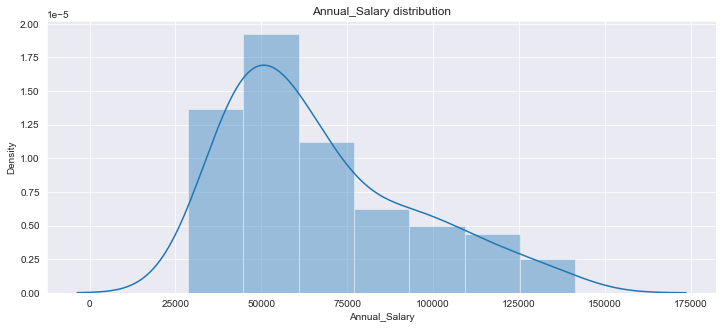

In [8]:
plt.figure(figsize = (12, 5))
sns.distplot(Salary.Annual_Salary)
plt.title("Annual_Salary distribution")

Text(0.5, 1.0, 'Annual_Expense distribution')

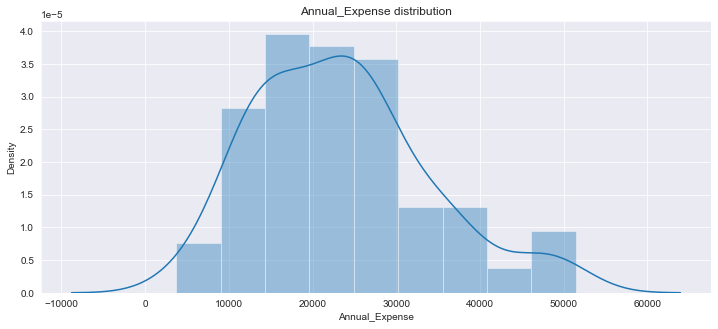

In [9]:
plt.figure(figsize = (12, 5))
sns.distplot(Expense.Annual_Expense)
plt.title("Annual_Expense distribution")

Text(0.5, 1.0, 'Annual_balance distribution')

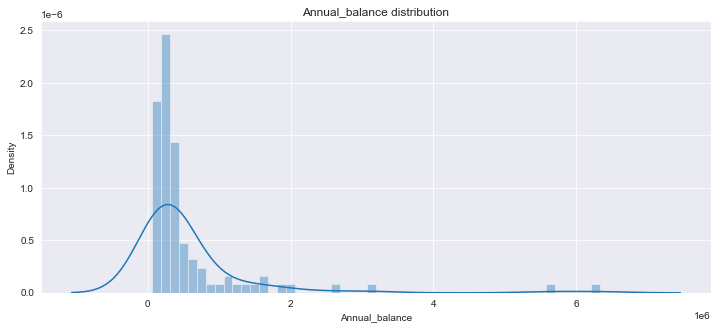

In [10]:
plt.figure(figsize = (12, 5))
sns.distplot(Balance.Annual_balance)
plt.title("Annual_balance distribution")

# Adding age and gender to the newly created data

In [11]:
Salary = pd.merge(Salary,data[['customer_id','age','gender']],on='customer_id', how='left')
Salary.drop_duplicates(inplace=True)
Salary.head()

,customer_id,amount,Annual_Salary,age,gender
0,CUS-1005756958,12616.11,50464.44,53,F
73,CUS-1117979751,25050.55,100202.20,21,M
173,CUS-1140341822,11499.06,45996.24,28,M
253,CUS-1147642491,22248.07,88992.28,34,F
371,CUS-1196156254,27326.11,109304.44,34,F


# Adding balance data to salary data

In [12]:
Salary = pd.merge(Salary,Balance,on='customer_id', how='left')
Salary.drop_duplicates(inplace=True)
Salary.head()

,customer_id,amount,Annual_Salary,age,gender,balance,Annual_balance
0,CUS-1005756958,12616.11,50464.44,53,F,61342.65,245370.60
1,CUS-1117979751,25050.55,100202.20,21,M,83700.42,334801.68
2,CUS-1140341822,11499.06,45996.24,28,M,35050.32,140201.28
3,CUS-1147642491,22248.07,88992.28,34,F,114575.08,458300.32
4,CUS-1196156254,27326.11,109304.44,34,F,166920.02,667680.08


# Adding Expense data to salary data


In [13]:
Salary = pd.merge(Salary,Expense,on='customer_id', how='left')
Salary.drop_duplicates(inplace=True)
Salary.head()

,customer_id,amount_x,Annual_Salary,age,gender,balance,Annual_balance,amount_y,Annual_Expense
0,CUS-1005756958,12616.11,50464.44,53,F,61342.65,245370.60,3652.86,14611.0
1,CUS-1117979751,25050.55,100202.20,21,M,83700.42,334801.68,8933.82,35735.0
2,CUS-1140341822,11499.06,45996.24,28,M,35050.32,140201.28,5511.54,22046.0
3,CUS-1147642491,22248.07,88992.28,34,F,114575.08,458300.32,6732.75,26931.0
4,CUS-1196156254,27326.11,109304.44,34,F,166920.02,667680.08,8724.61,34898.0


# Scatter plot to check relationship of annual salary with other factors

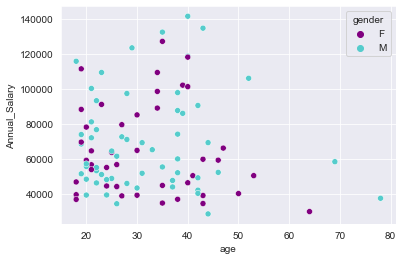

In [14]:
sns.scatterplot(x= 'age', y= 'Annual_Salary',  hue='gender',
               data=Salary,
               palette=['purple', '#55CCCC']);

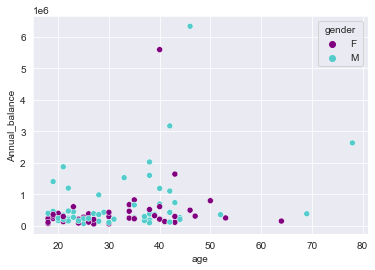

In [15]:
sns.scatterplot(x= 'age', y= 'Annual_balance', hue='gender',
               data=Salary,
               palette=['purple', '#55CCCC']);

# Dropping columns to avoid correlation

Since annual_expense, annual_salary and annual_ balance were calculated from the data, the originals need to be deleted to avoid correlation, which disturbs the data.

In [16]:
Salary.drop(columns =['customer_id','amount_x','amount_y','balance'], inplace= True)

# Checking Correlation

In [17]:
Salary.corr()

,Annual_Salary,age,Annual_balance,Annual_Expense
Annual_Salary,1.000000,-0.036504,0.217715,0.373476
age,-0.036504,1.000000,0.289224,-0.086174
Annual_balance,0.217715,0.289224,1.000000,0.004943
Annual_Expense,0.373476,-0.086174,0.004943,1.000000


The data looks good with low correlation.

In [18]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Salary   100 non-null    float64
 1   age             100 non-null    int64  
 2   gender          100 non-null    object 
 3   Annual_balance  100 non-null    float64
 4   Annual_Expense  100 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 4.7+ KB


# Encoding gender for the model

In [19]:
Salary = pd.get_dummies(Salary,columns=['gender'])

In [20]:
Salary.head()

,Annual_Salary,age,Annual_balance,Annual_Expense,gender_F,gender_M
0,50464.44,53,245370.60,14611.0,1,0
1,100202.20,21,334801.68,35735.0,0,1
2,45996.24,28,140201.28,22046.0,0,1
3,88992.28,34,458300.32,26931.0,1,0
4,109304.44,34,667680.08,34898.0,1,0


In [21]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Salary   100 non-null    float64
 1   age             100 non-null    int64  
 2   Annual_balance  100 non-null    float64
 3   Annual_Expense  100 non-null    float64
 4   gender_F        100 non-null    uint8  
 5   gender_M        100 non-null    uint8  
dtypes: float64(3), int64(1), uint8(2)
memory usage: 4.1 KB


# Linear regression

In [22]:
x = Salary.drop('Annual_Salary', axis='columns')
y = Salary['Annual_Salary']

In [23]:
#initialize the linear regression model
reg = linear_model.LinearRegression()

In [24]:
#split the data into 70% training and 33% testing data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=7)

In [25]:
#train the model
reg.fit(x_train, y_train)

LinearRegression()

In [26]:
#print the coefficients/weights for each feature/column of our model
print(reg.coef_)

[-2.19854918e+02  2.98116645e-03  8.77244212e-01 -3.24159489e+03
  3.24159489e+03]


In [27]:
y_pred = reg.predict(x_test)
print(y_pred)

[66169.19169742 73238.40211721 67870.27501126 82291.76186935
 58072.28717096 57881.30249663 69273.84842515 57906.52412454
 67626.99063658 75146.47780116 77691.48793785 64701.99935058
 65233.22702201 71287.20044804 62880.56730571 62093.20570672
 56473.86099523 61340.1809038  75227.34041434 68533.01201909
 71981.9013954  69816.96105331 78150.49074061 54270.48300664
 61215.47635446 75355.5409963  54143.23057579 73745.14836422
 76595.75997825 64676.66144645]


In [28]:
#print the actual values
print(y_test)

37    127048.48
26     85991.92
78     36904.32
91    118049.12
49     39128.64
15     59290.80
93     85109.44
71     44235.36
86     51508.60
22     61538.96
13    109310.60
40     53249.52
52     44873.40
12     39426.24
88     39287.20
45     39379.92
11     58414.72
66     44004.00
20     78147.44
18     46388.68
50    123348.40
2      45996.24
17     68513.76
85     44550.72
5      63906.08
97     43406.88
51     44194.08
30     55408.08
74     55111.68
96     53927.64
Name: Annual_Salary, dtype: float64


In [29]:
reg.score(x_train,y_train)

0.1741029921866517

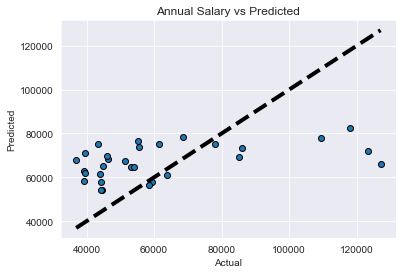

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Annual Salary vs Predicted")
plt.show()

The linear regression model accuracy was 17.4%

# DECISION TREE

In [32]:
x = Salary.drop('Annual_Salary', axis='columns')
y = Salary['Annual_Salary']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3,random_state=7)

In [34]:
dt = DecisionTreeRegressor(max_depth=4,min_samples_leaf=0.1,random_state=7)

In [35]:
dt.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=7)

In [36]:
y_pred = dt.predict(x_test)
print(y_pred)

[ 76408.79428571  96712.74285714  52270.156       96712.74285714
  52270.156       96712.74285714  76408.79428571  44048.15076923
  64360.90153846  76408.79428571  76408.79428571  44048.15076923
  70733.33333333  52270.156       52270.156       44048.15076923
  64360.90153846  44048.15076923 106748.31        70733.33333333
  76408.79428571  52270.156       76408.79428571  44048.15076923
  70733.33333333  52270.156       64360.90153846  70733.33333333
  70733.33333333  70733.33333333]


In [37]:
print(y_test)

37    127048.48
26     85991.92
78     36904.32
91    118049.12
49     39128.64
15     59290.80
93     85109.44
71     44235.36
86     51508.60
22     61538.96
13    109310.60
40     53249.52
52     44873.40
12     39426.24
88     39287.20
45     39379.92
11     58414.72
66     44004.00
20     78147.44
18     46388.68
50    123348.40
2      45996.24
17     68513.76
85     44550.72
5      63906.08
97     43406.88
51     44194.08
30     55408.08
74     55111.68
96     53927.64
Name: Annual_Salary, dtype: float64


In [38]:
dt.score(x_train,y_train)

0.5600863941994056

In [39]:
mse_dt = MSE(y_test, y_pred)

In [40]:
rmse_dt = mse_dt**(1/2)

In [41]:
print(rmse_dt)

20527.660154490288


The DecisionTreeRegression gave 56% accuracy.

# Conclusion

The Decision Tree performed better than the linear regression. The DecisionTreeRegressor achieved a score of 56% while the linear regression was 17%. 
The RMSE of the model over the whole dataset is over 20000, which indicates the inaccuracy of the model. It is thus
risky to use this linear model to predict customers’ income bracket. More data is required to develop a more
reliable model.